In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import contextlib

# Učitavanje podataka

In [135]:
path = "MREZA_CESTOVNIH_PRAVACA.xlsx"
df = pd.read_excel(path)
df.head()

,POLAZIŠTE,ODREDIŠTE,OZNAKA CESTE,UDALJENOST km,PROSJEČNA BRZ km/h,TRAJANJE [min]
0,ZAGREB,IVANIĆ GRAD,E70,59.2,74.000000,NaN
1,ZAGREB,KUTINA,E70,82.5,85.344828,NaN
2,ZAGREB,POŽEGA,E70,174.0,90.782609,NaN
3,ZAGREB,ĐAKOVO,E70,242.0,106.764706,NaN
4,ZAGREB,VIROVITICA,D2,141.0,57.162162,NaN


# Dodavanje 10 novih cestovnih pravaca

In [136]:
new_data = [{"POLAZIŠTE": "ZAGREB", "ODREDIŠTE": "OSIJEK", "UDALJENOST km": 285, "PROSJEČNA BRZ km/h": 100},
            {"POLAZIŠTE": "KUTINA", "ODREDIŠTE": "OSIJEK", "UDALJENOST km": 209, "PROSJEČNA BRZ km/h": 105},
            {"POLAZIŠTE": "NAŠICE", "ODREDIŠTE": "OSIJEK", "UDALJENOST km": 54.2, "PROSJEČNA BRZ km/h": 63},
            {"POLAZIŠTE": "VARAŽDIN", "ODREDIŠTE": "ZAGREB", "UDALJENOST km": 85.3, "PROSJEČNA BRZ km/h": 74},
            {"POLAZIŠTE": "VARAŽDIN", "ODREDIŠTE": "OSIJEK", "UDALJENOST km": 342, "PROSJEČNA BRZ km/h": 108},
            {"POLAZIŠTE": "VARAŽDIN", "ODREDIŠTE": "POŽEGA", "UDALJENOST km": 233, "PROSJEČNA BRZ km/h": 99},
            {"POLAZIŠTE": "ĐAKOVO", "ODREDIŠTE": "OSIJEK", "UDALJENOST km": 43.4, "PROSJEČNA BRZ km/h": 78},
            {"POLAZIŠTE": "OSIJEK", "ODREDIŠTE": "VUKOVAR", "UDALJENOST km": 35.9, "PROSJEČNA BRZ km/h": 55},
            {"POLAZIŠTE": "ĐAKOVO", "ODREDIŠTE": "VUKOVAR", "UDALJENOST km": 57.2, "PROSJEČNA BRZ km/h": 51},
            {"POLAZIŠTE": "NAŠICE", "ODREDIŠTE": "VUKOVAR", "UDALJENOST km": 86.5, "PROSJEČNA BRZ km/h": 68}]

for row in new_data:
    df.loc[-1] = row
    df.index = df.index + 1
    df = df.sort_index()

df.head()

,POLAZIŠTE,ODREDIŠTE,OZNAKA CESTE,UDALJENOST km,PROSJEČNA BRZ km/h,TRAJANJE [min]
0,NAŠICE,VUKOVAR,NaN,86.5,68.0,NaN
1,ĐAKOVO,VUKOVAR,NaN,57.2,51.0,NaN
2,OSIJEK,VUKOVAR,NaN,35.9,55.0,NaN
3,ĐAKOVO,OSIJEK,NaN,43.4,78.0,NaN
4,VARAŽDIN,POŽEGA,NaN,233.0,99.0,NaN


# Izračunavanje trajanja

In [137]:
df['TRAJANJE [min]'] = df['UDALJENOST km'] / df['PROSJEČNA BRZ km/h'] * 60
df.head()

,POLAZIŠTE,ODREDIŠTE,OZNAKA CESTE,UDALJENOST km,PROSJEČNA BRZ km/h,TRAJANJE [min]
0,NAŠICE,VUKOVAR,NaN,86.5,68.0,76.323529
1,ĐAKOVO,VUKOVAR,NaN,57.2,51.0,67.294118
2,OSIJEK,VUKOVAR,NaN,35.9,55.0,39.163636
3,ĐAKOVO,OSIJEK,NaN,43.4,78.0,33.384615
4,VARAŽDIN,POŽEGA,NaN,233.0,99.0,141.212121


# Stvaranje dictionary objekta za kreiranje grafa

In [138]:
def create_dict_from_dataframe(df: pd.DataFrame, weight: str) -> dict:

    graph_dict = {}

    for index, row in df.iterrows():
        start = row['POLAZIŠTE'].strip()
        end = row['ODREDIŠTE'].strip()
        weight_value = round(row[weight], 2)
        
        if start not in graph_dict:
            graph_dict[start] = {end: weight_value}
        else:
            graph_dict[start][end] = weight_value

        if end not in graph_dict:
                graph_dict[end] = {start: weight_value}
        else:
             graph_dict[end][start] = weight_value

    return graph_dict

graph_dict_duration = create_dict_from_dataframe(df, weight='TRAJANJE [min]')
graph_dict_distance = create_dict_from_dataframe(df, weight='UDALJENOST km')

# 1.1 Lista susjedstva

In [139]:
def list_of_neighbours(graph_dict: dict) -> list:

    city_list = [i for i in graph_dict]
    city_list.sort()

    arr = []

    for i in city_list:
        for j in city_list:
            if j in graph_dict[i]:
                pair = [i, j]
                pair.sort()
                arr.append(tuple(pair))

    arr = list(set(arr))
    arr.sort()
    return arr

neighbours_duration = list_of_neighbours(graph_dict_duration)
neighbours_distance = list_of_neighbours(graph_dict_distance)

print(neighbours_duration)
print(neighbours_distance)

[('BJELOVAR', 'GAREŠNICA'), ('BJELOVAR', 'VIROVITICA'), ('BJELOVAR', 'ZAGREB'), ('BJELOVAR', 'ČAZMA'), ('DARUVAR', 'GAREŠNICA'), ('DARUVAR', 'NAŠICE'), ('DARUVAR', 'PAKRAC'), ('DARUVAR', 'POŽEGA'), ('DARUVAR', 'VIROVITICA'), ('GAREŠNICA', 'KUTINA'), ('GAREŠNICA', 'PAKRAC'), ('GAREŠNICA', 'VIROVITICA'), ('IVANIĆ GRAD', 'KUTINA'), ('IVANIĆ GRAD', 'ZAGREB'), ('IVANIĆ GRAD', 'ČAZMA'), ('KUTINA', 'NOVSKA'), ('KUTINA', 'OSIJEK'), ('KUTINA', 'VIROVITICA'), ('KUTINA', 'ZAGREB'), ('NAŠICE', 'OSIJEK'), ('NAŠICE', 'PAKRAC'), ('NAŠICE', 'POŽEGA'), ('NAŠICE', 'VIROVITICA'), ('NAŠICE', 'VUKOVAR'), ('NAŠICE', 'ĐAKOVO'), ('NOVSKA', 'PAKRAC'), ('NOVSKA', 'POŽEGA'), ('OSIJEK', 'VARAŽDIN'), ('OSIJEK', 'VUKOVAR'), ('OSIJEK', 'ZAGREB'), ('OSIJEK', 'ĐAKOVO'), ('PAKRAC', 'POŽEGA'), ('POŽEGA', 'VARAŽDIN'), ('POŽEGA', 'VIROVITICA'), ('POŽEGA', 'ZAGREB'), ('POŽEGA', 'ĐAKOVO'), ('VARAŽDIN', 'ZAGREB'), ('VIROVITICA', 'ZAGREB'), ('VIROVITICA', 'ĐAKOVO'), ('VUKOVAR', 'ĐAKOVO'), ('ZAGREB', 'ĐAKOVO')]
[('BJELOVAR', '

# 1.2 Matrica susjedstva

In [140]:
def adjacency_matrix(graph_dict: dict) -> pd.DataFrame:

    city_list = [i for i in graph_dict]
    city_list.sort()

    arr = [[0 for i in range(len(city_list))] for i in range(len(city_list))]

    for idx_i, i in enumerate(city_list):
        for idx_j, j in enumerate(city_list):
            if j in graph_dict[i]:
                arr[idx_i][idx_j] = graph_dict[i][j]
                arr[idx_j][idx_i] = graph_dict[j][i]

    adjacency = pd.DataFrame(arr, columns=city_list, index=city_list)
    return adjacency

matrix_duration = adjacency_matrix(graph_dict_duration)
matrix_distance = adjacency_matrix(graph_dict_distance)

In [141]:
matrix_duration

,BJELOVAR,DARUVAR,GAREŠNICA,IVANIĆ GRAD,KUTINA,NAŠICE,NOVSKA,OSIJEK,PAKRAC,POŽEGA,VARAŽDIN,VIROVITICA,VUKOVAR,ZAGREB,ČAZMA,ĐAKOVO
BJELOVAR,0.0,0.0,44.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,64.0,0.00,79.00,32.0,0.00
DARUVAR,0.0,0.0,28.0,0.0,0.00,109.00,0.0,0.00,23.0,66.00,0.00,52.0,0.00,0.00,0.0,0.00
GAREŠNICA,44.0,28.0,0.0,0.0,19.00,0.00,0.0,0.00,35.0,0.00,0.00,49.0,0.00,0.00,0.0,0.00
IVANIĆ GRAD,0.0,0.0,0.0,0.0,51.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,48.00,21.0,0.00
KUTINA,0.0,0.0,19.0,51.0,0.00,0.00,27.0,119.43,0.0,0.00,0.00,67.0,0.00,58.00,0.0,0.00
NAŠICE,0.0,109.0,0.0,0.0,0.00,0.00,0.0,51.62,92.0,51.00,0.00,73.0,76.32,0.00,0.0,36.00
NOVSKA,0.0,0.0,0.0,0.0,27.00,0.00,0.0,0.00,28.0,68.00,0.00,0.0,0.00,0.00,0.0,0.00
OSIJEK,0.0,0.0,0.0,0.0,119.43,51.62,0.0,0.00,0.0,0.00,190.00,0.0,39.16,171.00,0.0,33.38
PAKRAC,0.0,23.0,35.0,0.0,0.00,92.00,28.0,0.00,0.0,45.00,0.00,0.0,0.00,0.00,0.0,0.00
POŽEGA,0.0,66.0,0.0,0.0,0.00,51.00,68.0,0.00,45.0,0.00,141.21,95.0,0.00,115.00,0.0,75.00


In [142]:
matrix_distance

,BJELOVAR,DARUVAR,GAREŠNICA,IVANIĆ GRAD,KUTINA,NAŠICE,NOVSKA,OSIJEK,PAKRAC,POŽEGA,VARAŽDIN,VIROVITICA,VUKOVAR,ZAGREB,ČAZMA,ĐAKOVO
BJELOVAR,0.0,0.0,44.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.2,0.0,83.9,30.8,0.0
DARUVAR,0.0,0.0,29.5,0.0,0.0,86.1,0.0,0.0,20.9,68.0,0.0,52.1,0.0,0.0,0.0,0.0
GAREŠNICA,44.5,29.5,0.0,0.0,19.4,0.0,0.0,0.0,33.9,0.0,0.0,50.7,0.0,0.0,0.0,0.0
IVANIĆ GRAD,0.0,0.0,0.0,0.0,44.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.2,19.1,0.0
KUTINA,0.0,0.0,19.4,44.6,0.0,0.0,25.6,209.0,0.0,0.0,0.0,70.0,0.0,82.5,0.0,0.0
NAŠICE,0.0,86.1,0.0,0.0,0.0,0.0,0.0,54.2,95.3,47.2,0.0,77.2,86.5,0.0,0.0,34.8
NOVSKA,0.0,0.0,0.0,0.0,25.6,0.0,0.0,0.0,26.1,66.6,0.0,0.0,0.0,0.0,0.0,0.0
OSIJEK,0.0,0.0,0.0,0.0,209.0,54.2,0.0,0.0,0.0,0.0,342.0,0.0,35.9,285.0,0.0,43.4
PAKRAC,0.0,20.9,33.9,0.0,0.0,95.3,26.1,0.0,0.0,49.4,0.0,0.0,0.0,0.0,0.0,0.0
POŽEGA,0.0,68.0,0.0,0.0,0.0,47.2,66.6,0.0,49.4,0.0,233.0,90.7,0.0,174.0,0.0,71.9


# 2. Kreiranje i crtanje grafa

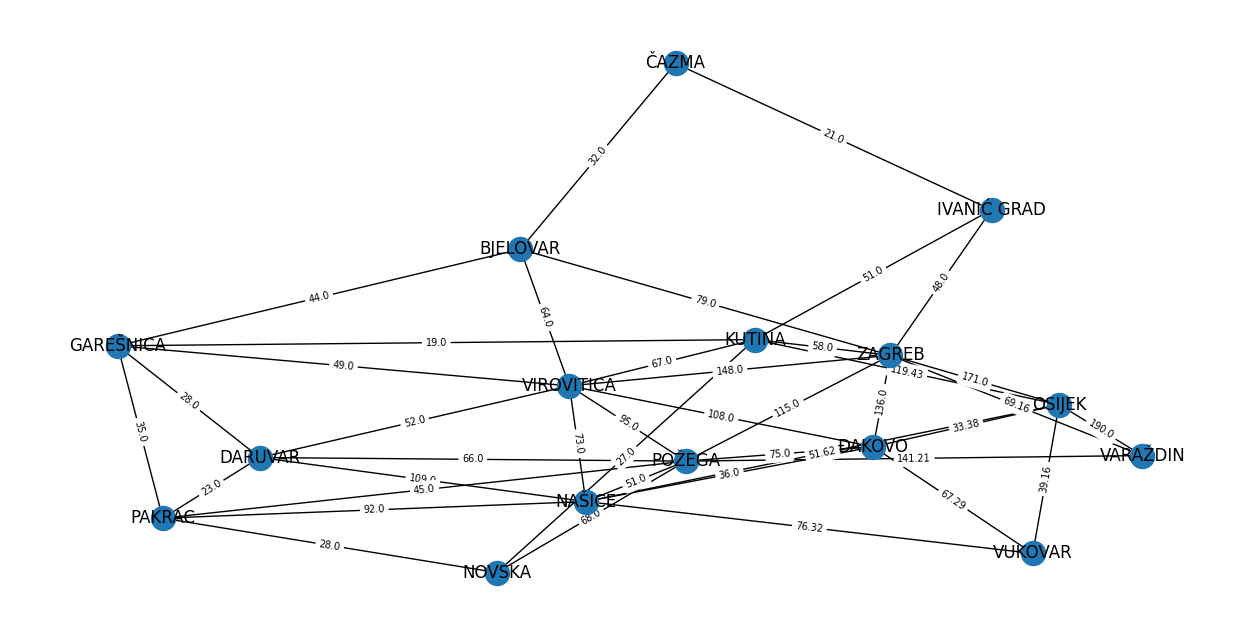

In [143]:
def draw_weighted_graph(graph: nx.Graph, graph_dict: dict) -> None:

    for i,j in graph.edges():
        graph[i][j]['weight'] = graph_dict[i][j]

    weight_labels = nx.get_edge_attributes(graph,'weight')
    pos = nx.spring_layout(graph)

    fig, ax = plt.subplots(figsize=(16, 8))
    nx.draw(graph,pos, with_labels = True)
    with contextlib.redirect_stdout(None):
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=weight_labels, font_size=7)

graph_duration = nx.Graph(graph_dict_duration)
draw_weighted_graph(graph_duration, graph_dict_duration)

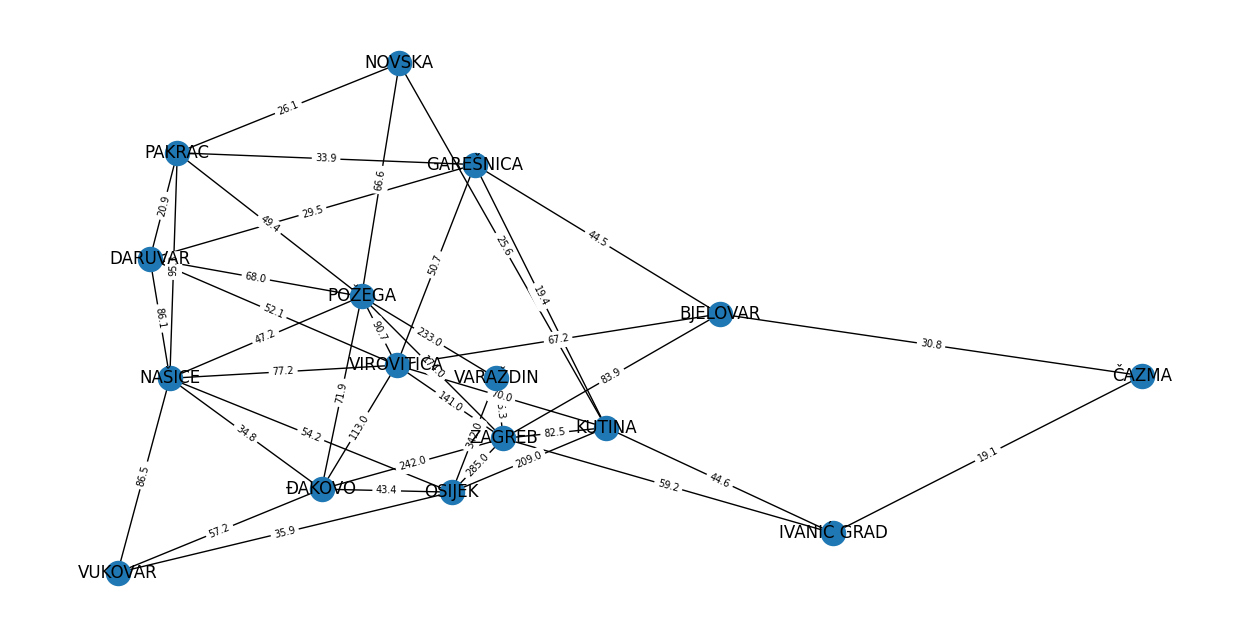

In [144]:
graph_distance = nx.Graph(graph_dict_distance)
draw_weighted_graph(graph_distance, graph_dict_distance)

# 3. Najkraći putevi između proizvoljno zadanih polazišta i odredišta

In [145]:
paths = [('VUKOVAR', 'NOVSKA'),
         ('VUKOVAR', 'VARAŽDIN'),
         ('DARUVAR', 'ĐAKOVO'),
         ('ZAGREB', 'OSIJEK')]

for start, end in paths:
    
    min_path_duration = nx.dijkstra_path(graph_duration, start, end)
    min_path_distance = nx.dijkstra_path(graph_distance, start, end)

    min_duration = nx.dijkstra_path_length(graph_duration, start, end)
    min_distance = nx.dijkstra_path_length(graph_distance, start, end)

    print(f'Najkraće trajanje od {start} do {end} je {round(min_duration, 2)} minuta, putanjom {"-".join(min_path_duration)}')
    print(f'Najkraća udaljenost od {start} do {end} je {round(min_distance, 3)} km, putanjom {"-".join(min_path_distance)}\n')

Najkraće trajanje od VUKOVAR do NOVSKA je 185.59 minuta, putanjom VUKOVAR-OSIJEK-KUTINA-NOVSKA
Najkraća udaljenost od VUKOVAR do NOVSKA je 195.7 km, putanjom VUKOVAR-ĐAKOVO-POŽEGA-NOVSKA

Najkraće trajanje od VUKOVAR do VARAŽDIN je 229.16 minuta, putanjom VUKOVAR-OSIJEK-VARAŽDIN
Najkraća udaljenost od VUKOVAR do VARAŽDIN je 362.1 km, putanjom VUKOVAR-ĐAKOVO-POŽEGA-VARAŽDIN

Najkraće trajanje od DARUVAR do ĐAKOVO je 141.0 minuta, putanjom DARUVAR-POŽEGA-ĐAKOVO
Najkraća udaljenost od DARUVAR do ĐAKOVO je 120.9 km, putanjom DARUVAR-NAŠICE-ĐAKOVO

Najkraće trajanje od ZAGREB do OSIJEK je 169.38 minuta, putanjom ZAGREB-ĐAKOVO-OSIJEK
Najkraća udaljenost od ZAGREB do OSIJEK je 271.7 km, putanjom ZAGREB-KUTINA-GAREŠNICA-DARUVAR-NAŠICE-OSIJEK



# 4. Netežinski graf

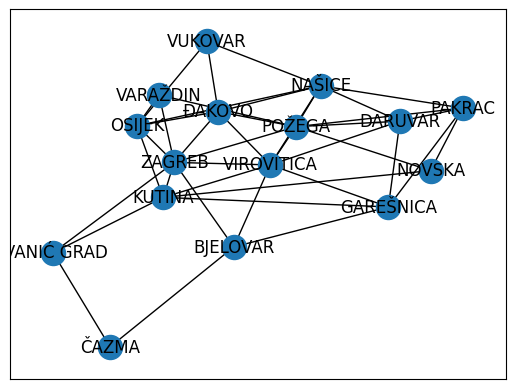

In [146]:
nx.draw_networkx(graph_duration)

# 4.a Dijametar, gustoća, stupnjevi čvorova

In [147]:
diameter = nx.diameter(graph_duration)
density = 2 * len(graph_duration.edges()) / (len(graph_duration.nodes()) * (len(graph_duration.nodes()) - 1)) # ili nx.density(graph_duration)
degrees = list(graph_duration.degree())
degrees.sort(key=lambda x: x[1], reverse=True)

print(f'Dijametar: {diameter}')
print(f'Gustoća: {density}')
print(f'Sekvenca stupnjeva čvorova: {degrees}')

Dijametar: 4
Gustoća: 0.3416666666666667
Sekvenca stupnjeva čvorova: [('POŽEGA', 8), ('ZAGREB', 8), ('VIROVITICA', 8), ('NAŠICE', 7), ('ĐAKOVO', 6), ('OSIJEK', 6), ('KUTINA', 6), ('GAREŠNICA', 5), ('DARUVAR', 5), ('PAKRAC', 5), ('BJELOVAR', 4), ('VUKOVAR', 3), ('VARAŽDIN', 3), ('IVANIĆ GRAD', 3), ('NOVSKA', 3), ('ČAZMA', 2)]


# 4.b Mjere centralnosti
- centralnost stupnja (degree centrality)
- centralnost međupoloženosti (betweenness centrality)
- centralnost bliskosti (closeness centrality)
- svojstvena centralnost (eigenvector centrality)

In [148]:
deg_centrality = nx.centrality.degree_centrality(graph_distance)
bet_centrality = nx.centrality.betweenness_centrality(graph_distance)
close_centrality = nx.centrality.closeness_centrality(graph_distance)
eigen_centrality = nx.centrality.eigenvector_centrality(graph_distance)

cities = deg_centrality.keys()

centrality_labels = ['Centralnost stupnjeva', 'Centralnost međupoloženosti', 'Centralnost bliskosti', 'Svojstvena centralnost']
centralities = [deg_centrality, close_centrality, bet_centrality, eigen_centrality]

centrality_arr = [[centrality[c] for centrality in centralities] for c in cities]
centrality_arr = pd.DataFrame(centrality_arr, columns=centrality_labels, index=cities)
centrality_arr

,Centralnost stupnjeva,Centralnost međupoloženosti,Centralnost bliskosti,Svojstvena centralnost
NAŠICE,0.466667,0.600000,0.076916,0.330924
VUKOVAR,0.200000,0.454545,0.000000,0.153515
ĐAKOVO,0.400000,0.600000,0.039320,0.310666
OSIJEK,0.400000,0.600000,0.068458,0.262254
VARAŽDIN,0.200000,0.517241,0.002381,0.164066
POŽEGA,0.533333,0.652174,0.115986,0.364188
ZAGREB,0.533333,0.681818,0.165079,0.339522
KUTINA,0.400000,0.625000,0.110748,0.245368
IVANIĆ GRAD,0.200000,0.483871,0.045351,0.107240
VIROVITICA,0.533333,0.681818,0.117982,0.378689
